This notebook contains all test-model runs for initial testing, transfer learning, and advanced architecture changes.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-11-21 09:42:21.612398: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-21 09:42:21.630122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732200141.642788  371569 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732200141.646667  371569 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 09:42:21.662122: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
category = 'time' #Brendan, you will do medium, Pete you will do time, so swap your assignment into the category variable
train_data = tf.data.Dataset.load(f'data/train_{category}')
val_data = tf.data.Dataset.load(f'data/valid_{category}')
train_data = train_data.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

I0000 00:00:1732200145.353522  371569 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1024 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:04:00.0, compute capability: 8.6


2024-11-21 09:42:25.456107: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


tf.Tensor(b'middle', shape=(), dtype=string)


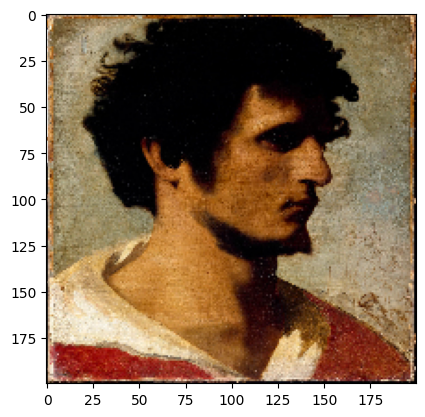

In [3]:
for image, label in train_data.take(1):
    plt.imshow(image)
    print(label)
    break

Loading data...
Creating datasets...
Creating model...

Starting training...

Epoch 1/10


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 14523421295911776837
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 4280183468569771705
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing t

Step 0: Loss = 1.0987
Step 10: Loss = 1.0018
Step 20: Loss = 0.9348
Step 30: Loss = 1.0723
Step 40: Loss = 1.0830
Step 50: Loss = 0.8850
Step 60: Loss = 1.1982
Step 70: Loss = 0.9360
Step 80: Loss = 0.8400
Step 90: Loss = 0.8586
Training accuracy: 0.5503


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 4280183468569771705


Validation accuracy: 0.5748

Epoch 2/10
Step 0: Loss = 1.0416
Step 10: Loss = 0.8782
Step 20: Loss = 0.9909
Step 30: Loss = 1.0111
Step 40: Loss = 0.8969
Step 50: Loss = 1.0505
Step 60: Loss = 0.8862
Step 70: Loss = 0.9506
Step 80: Loss = 0.8621
Step 90: Loss = 0.7835
Training accuracy: 0.5633
Validation accuracy: 0.5865

Epoch 3/10
Step 0: Loss = 0.6910
Step 10: Loss = 0.8230
Step 20: Loss = 0.9066
Step 30: Loss = 1.0348
Step 40: Loss = 0.7908
Step 50: Loss = 1.0890
Step 60: Loss = 0.7811
Step 70: Loss = 0.7701
Step 80: Loss = 0.8237
Step 90: Loss = 0.7947
Training accuracy: 0.5901
Validation accuracy: 0.6012

Epoch 4/10
Step 0: Loss = 0.9106
Step 10: Loss = 0.7263
Step 20: Loss = 0.8982
Step 30: Loss = 0.9076
Step 40: Loss = 0.8277
Step 50: Loss = 0.7856
Step 60: Loss = 0.8161
Step 70: Loss = 0.8153
Step 80: Loss = 0.8237
Step 90: Loss = 0.6734
Training accuracy: 0.5809
Validation accuracy: 0.5924

Epoch 5/10
Step 0: Loss = 0.8297
Step 10: Loss = 0.5378
Step 20: Loss = 0.7757
Step 30

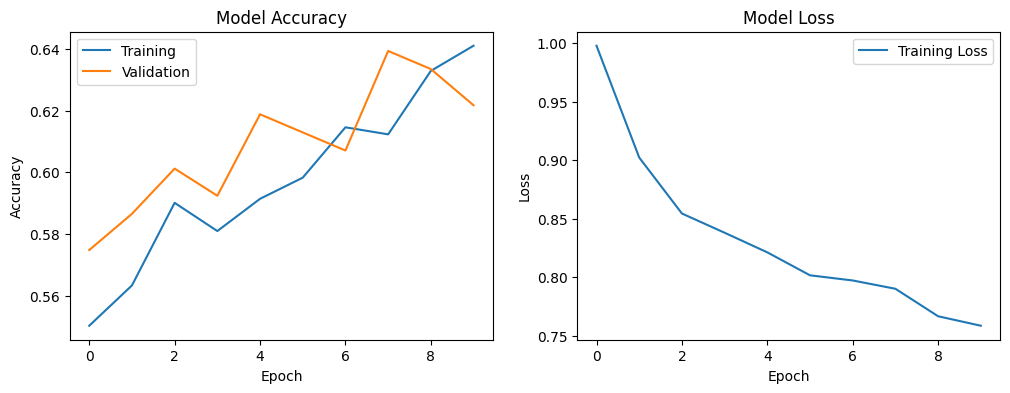

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#load data
print("Loading data...")
category = 'time'
train_data = tf.data.Dataset.load(f'data/train_{category}')
val_data = tf.data.Dataset.load(f'data/valid_{category}')

#hyperparameters
IMG_SIZE = 200
BATCH_SIZE = 32
NUM_CLASSES = 3
CLASSES = ['early', 'middle', 'late']
EPOCHS = 10

def encode_label(label):#decoding as it had issues passes images
    label_str = label.numpy().decode('utf-8')
    return CLASSES.index(label_str)

def preprocess(image, label):
    #swap grayscale to rgb
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = image / 255.0
    
    #labeling
    label_idx = tf.py_function(func=encode_label, inp=[label], Tout=tf.int32)
    label_idx = tf.reshape(label_idx, ())
    return image, label_idx

#now actually creating the datasets, shuffle etc as the codeathon1, and our tempalte
print("Creating datasets...")
def create_dataset(data):
    return (data
            .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            .cache()
            .shuffle(1000)
            .batch(BATCH_SIZE)
            .prefetch(tf.data.AUTOTUNE))

train_ds = create_dataset(train_data)
val_ds = create_dataset(val_data)

#modeling
print("Creating model...")
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))#had to pass imgsize here from the stored vaiable, instead of 200x200x3
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(NUM_CLASSES)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

#loss and optimizer function, stringed from previous hw here
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

#this is where claude did explicit labels etc
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    train_acc_metric.update_state(labels, predictions)
    return loss

#validation
@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    val_acc_metric.update_state(labels, predictions)


history = {
    'loss': [],
    'accuracy': [],
    'val_accuracy': []
}

print("\nStarting training...")
try:
    #training loop
    for epoch in range(EPOCHS):
        print(f"\nEpoch {epoch+1}/{EPOCHS}")
        
        # Training
        epoch_loss = []
        for step, (images, labels) in enumerate(train_ds):
            loss = train_step(images, labels)
            epoch_loss.append(float(loss))
            
            if step % 10 == 0:
                print(f"Step {step}: Loss = {float(loss):.4f}")
        
        #calc acc
        train_acc = train_acc_metric.result()
        print(f"Training accuracy: {float(train_acc):.4f}")
        
        #val
        for images, labels in val_ds:
            val_step(images, labels)
        val_acc = val_acc_metric.result()
        print(f"Validation accuracy: {float(val_acc):.4f}")
        
        #mets
        history['loss'].append(np.mean(epoch_loss))
        history['accuracy'].append(float(train_acc))
        history['val_accuracy'].append(float(val_acc))
        
        #the reset metrics had to be swapped to state, like the issue we had with hw previously 
        train_acc_metric.reset_state()
        val_acc_metric.reset_state()
    
    #plotting
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training')
    plt.plot(history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()
#exception catch because OMG there were times when things just failed
except Exception as e:
    print("\nError during training:", str(e))
    print("\nDiagnostic information:")
    for images, labels in train_ds.take(1):
        print("Images shape:", images.shape)
        print("Labels shape:", labels.shape)
        print("Images dtype:", images.dtype)
        print("Labels dtype:", labels.dtype)
        print("Sample image values range:", tf.reduce_min(images).numpy(), "to", tf.reduce_max(images).numpy())
        print("Unique labels:", tf.unique(labels)[0].numpy())

#claude prediction fucntion
@tf.function
def predict(image):
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = image / 255.0
    image = tf.expand_dims(image, 0)
    predictions = model(image, training=False)
    return tf.argmax(predictions[0])

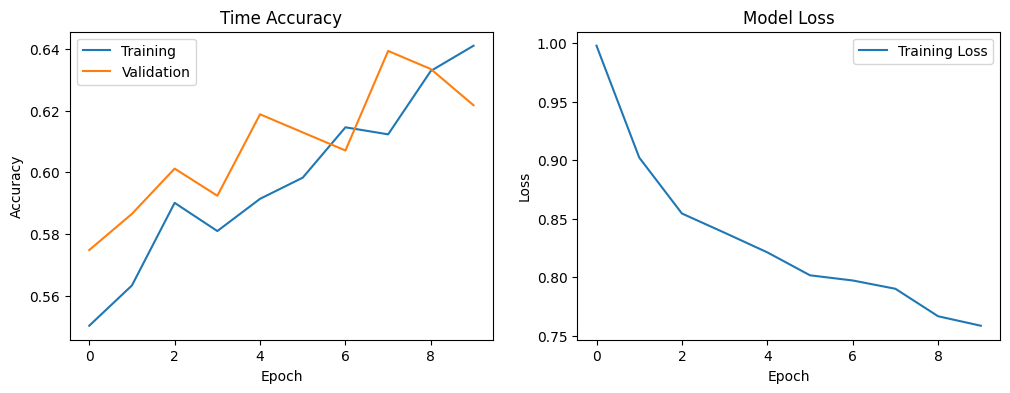

In [12]:
#plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training')
plt.plot(history['val_accuracy'], label='Validation')
plt.title('Time Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Loading data...
Creating datasets...
Creating model...

Starting training...

Epoch 1/20


/home/bjs6pj/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
E0000 00:00:1732200151.838948  371569 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape infunctional_1_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Step 0: Loss = 1.6040
Step 5: Loss = 1.3547
Training accuracy: 0.3700
Validation accuracy: 0.4500

Epoch 2/20
Step 0: Loss = 0.8928
Step 5: Loss = 0.8320
Training accuracy: 0.5800
Validation accuracy: 0.4500

Epoch 3/20
Step 0: Loss = 1.0206
Step 5: Loss = 1.4788
Training accuracy: 0.5700
Validation accuracy: 0.4500

Epoch 4/20
Step 0: Loss = 0.7633
Step 5: Loss = 0.8529
Training accuracy: 0.5800
Validation accuracy: 0.4500

Epoch 5/20
Step 0: Loss = 1.2814
Step 5: Loss = 0.5408
Training accuracy: 0.6100
Validation accuracy: 0.4500

Epoch 6/20
Step 0: Loss = 0.7569
Step 5: Loss = 1.7840
Training accuracy: 0.6400
Validation accuracy: 0.4500

Early stopping triggered after 6 epochs


2024-11-21 09:42:36.872949: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


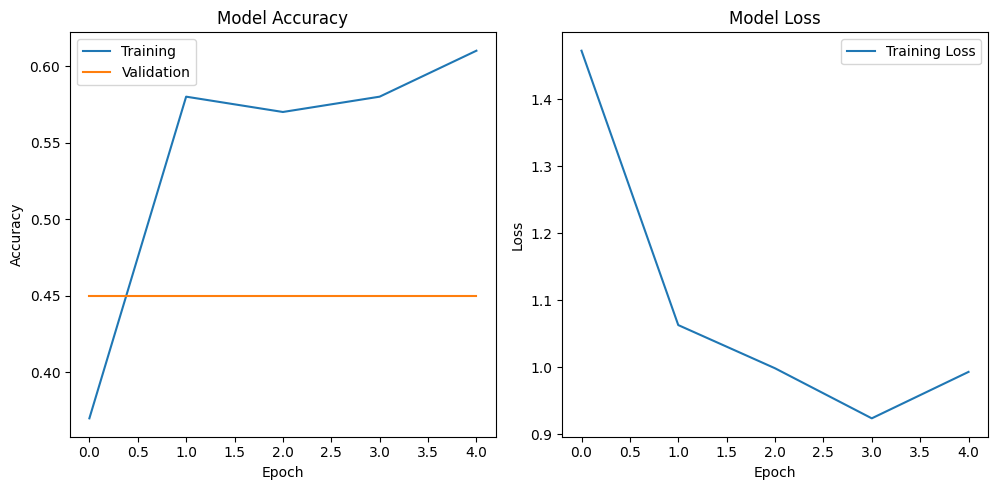

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#load data
print("Loading data...")
category = 'time'
train_data = tf.data.Dataset.load(f'data/baby_train_{category}')#we are using the baby data, SMALLER so be aware for trend in validation results
val_data = tf.data.Dataset.load(f'data/baby_valid_{category}')

#hypterparameters
IMG_SIZE = 200
BATCH_SIZE = 16
NUM_CLASSES = 3
CLASSES = ['early', 'middle', 'late']
EPOCHS = 20  # Increased epochs

#data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
])

def encode_label(label):
    label_str = label.numpy().decode('utf-8')
    return CLASSES.index(label_str)

def preprocess(image, label):
    
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = image / 255.0
    
    
    label_idx = tf.py_function(func=encode_label, inp=[label], Tout=tf.int32)
    label_idx = tf.reshape(label_idx, ())
    return image, label_idx

#create datasets
print("Creating datasets...")
def create_dataset(data, is_training=False):
    ds = (data
          .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
          .cache()
          .shuffle(1000 if is_training else 100)
          .batch(BATCH_SIZE)
          .prefetch(tf.data.AUTOTUNE))
    return ds

train_ds = create_dataset(train_data, is_training=True)
val_ds = create_dataset(val_data)

#improved architecture
print("Creating model...")
def create_improved_model():
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
   
    x = layers.Conv2D(32, 3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.2)(x)
    
    
    x = layers.Conv2D(64, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)
    
   
    x = layers.Conv2D(128, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.4)(x)
    
   
    x = layers.Conv2D(256, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.5)(x)
    
  
    x = layers.GlobalAveragePooling2D()(x)
    
    
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    
   
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

model = create_improved_model()

# Cosine decay learning rate
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate,
    first_decay_steps=1000,  
    t_mul=2.0,  
    m_mul=1.0, 
    alpha=0.0  
)


loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()


@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    
    gradients = tape.gradient(loss, model.trainable_weights)
    # Clip gradients to prevent exploding gradients
    gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    train_acc_metric.update_state(labels, predictions)
    return loss


@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    val_acc_metric.update_state(labels, predictions)

# training history
history = {
    'loss': [],
    'accuracy': [],
    'val_accuracy': []
}

# Early stopping
best_val_acc = 0
patience = 5
patience_counter = 0

print("\nStarting training...")
try:
    for epoch in range(EPOCHS):
        print(f"\nEpoch {epoch+1}/{EPOCHS}")
        
        # Training Loop
        epoch_loss = []
        for step, (images, labels) in enumerate(train_ds):
            loss = train_step(images, labels)
            epoch_loss.append(float(loss))
            
            if step % 5 == 0:  
                print(f"Step {step}: Loss = {float(loss):.4f}")
        
        
        train_acc = train_acc_metric.result()
        print(f"Training accuracy: {float(train_acc):.4f}")
        
        
        for images, labels in val_ds:
            val_step(images, labels)
        val_acc = val_acc_metric.result()
        print(f"Validation accuracy: {float(val_acc):.4f}")
        
        
        if float(val_acc) > best_val_acc:
            best_val_acc = float(val_acc)
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs")
            break
        
        
        history['loss'].append(np.mean(epoch_loss))
        history['accuracy'].append(float(train_acc))
        history['val_accuracy'].append(float(val_acc))
        
        
        train_acc_metric.reset_state()
        val_acc_metric.reset_state()
    
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(history['accuracy'], label='Training')
    plt.plot(history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("\nError during training:", str(e))
    print("\nDiagnostic information:")
    for images, labels in train_ds.take(1):
        print("Images shape:", images.shape)
        print("Labels shape:", labels.shape)
        print("Images dtype:", images.dtype)
        print("Labels dtype:", labels.dtype)
        print("Sample image values range:", tf.reduce_min(images).numpy(), 
              "to", tf.reduce_max(images).numpy())
        print("Unique labels:", tf.unique(labels)[0].numpy())


@tf.function
def predict(image):
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = image / 255.0
    image = tf.expand_dims(image, 0)
    predictions = model(image, training=False)
    probabilities = tf.nn.softmax(predictions[0])
    class_idx = tf.argmax(probabilities)
    confidence = tf.reduce_max(probabilities)
    return CLASSES[int(class_idx)], float(confidence)

### Notes

Upped epochs to 20, but the model tends to stop improving after the second epoch, so early stopping tends to kick in. We should probably use a greater number of epochs or a higher patience with a larger data size.

I tried adjusting the learning rate to 0.002 and a higher batch size, but it seems to dramatically reduce the training accuracy and heighten the loss. So I decreased batch size to 16 to avoid generalizations.

I then applied a few different learning rate schedules to the model including exponential decay, cyclical decay, and cosine decay. Cosine decay appears to have the best impact on accuracies in the short-term, but we should probably revisit these with larger datasets. This change is facing early stopping at the 10th iteration instead of the 6th.

The extra convolutional layer and ramping dropout follow from Brendan's work.

In the end, we have a increasing trend in model accuracy across epochs and a decreasing trend in loss which is promising. Further experimentation needed on our overall dataset.

Moving into p3, we should probably experiment with other net structures that follow the research in our proposal.

### Transfer Learning

### ResNet 101

2024-11-21 10:03:32.217332: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-21 10:03:32.229901: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732201412.242392  378520 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732201412.246238  378520 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 10:03:32.261534: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Loading data...
Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)


2024-11-21 10:03:38.502453: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-21 10:03:38.544622: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)
Creating model with transfer learning...


2024-11-21 10:03:38.747690: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-21 10:03:38.751103: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Starting training...

Epoch 1/20


I0000 00:00:1732201428.017529  378861 cuda_dnn.cc:529] Loaded cuDNN version 90300


Step 0: Loss = 1.8384
Step 5: Loss = 1.4850
Step 10: Loss = 1.8559
Step 15: Loss = 1.3549
Step 20: Loss = 1.3433
Step 25: Loss = 1.4623
Step 30: Loss = 1.9135
Step 35: Loss = 1.3479
Step 40: Loss = 1.2019
Step 45: Loss = 1.2067
Step 50: Loss = 1.4944
Step 55: Loss = 1.3628
Step 60: Loss = 1.2366
Step 65: Loss = 1.5989
Step 70: Loss = 1.1711
Step 75: Loss = 1.2916
Step 80: Loss = 1.2844
Step 85: Loss = 1.4855
Step 90: Loss = 1.0949
Step 95: Loss = 0.9812
Training accuracy: 0.4047


2024-11-21 10:04:04.461673: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation accuracy: 0.5748

Epoch 2/20
Step 0: Loss = 1.4361
Step 5: Loss = 1.1190
Step 10: Loss = 1.2341
Step 15: Loss = 1.1883
Step 20: Loss = 1.2648
Step 25: Loss = 1.1069
Step 30: Loss = 1.4236
Step 35: Loss = 1.1808
Step 40: Loss = 1.2816
Step 45: Loss = 1.0808
Step 50: Loss = 1.2991
Step 55: Loss = 1.2548
Step 60: Loss = 1.3534
Step 65: Loss = 0.9774
Step 70: Loss = 1.5210
Step 75: Loss = 1.1144
Step 80: Loss = 0.9598
Step 85: Loss = 1.1047
Step 90: Loss = 1.1281
Step 95: Loss = 1.1660
Training accuracy: 0.4612
Validation accuracy: 0.5748

Epoch 3/20
Step 0: Loss = 1.6460
Step 5: Loss = 1.2731
Step 10: Loss = 1.4352
Step 15: Loss = 1.1068
Step 20: Loss = 1.1707
Step 25: Loss = 1.2887
Step 30: Loss = 1.3205
Step 35: Loss = 1.3410
Step 40: Loss = 1.2965
Step 45: Loss = 0.9547
Step 50: Loss = 0.8757
Step 55: Loss = 1.1253
Step 60: Loss = 1.0183
Step 65: Loss = 1.1361
Step 70: Loss = 1.2458
Step 75: Loss = 1.0031
Step 80: Loss = 0.9657
Step 85: Loss = 1.2121
Step 90: Loss = 1.2192
S

2024-11-21 10:04:17.346048: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation accuracy: 0.5748

Epoch 4/20
Step 0: Loss = 1.0097
Step 5: Loss = 1.1355
Step 10: Loss = 1.3123
Step 15: Loss = 1.0698
Step 20: Loss = 1.1776
Step 25: Loss = 1.0766
Step 30: Loss = 1.0885
Step 35: Loss = 1.2532
Step 40: Loss = 1.1628
Step 45: Loss = 1.0876
Step 50: Loss = 1.1124
Step 55: Loss = 1.3751
Step 60: Loss = 0.8948
Step 65: Loss = 1.2249
Step 70: Loss = 1.2271
Step 75: Loss = 1.0864
Step 80: Loss = 1.0387
Step 85: Loss = 1.2970
Step 90: Loss = 1.1832
Step 95: Loss = 1.0468
Training accuracy: 0.4905
Validation accuracy: 0.5748

Epoch 5/20
Step 0: Loss = 1.2259
Step 5: Loss = 1.3221
Step 10: Loss = 1.3515
Step 15: Loss = 1.1016
Step 20: Loss = 1.1831
Step 25: Loss = 1.3063
Step 30: Loss = 1.2632
Step 35: Loss = 0.8041
Step 40: Loss = 1.3321
Step 45: Loss = 0.8807
Step 50: Loss = 1.3992
Step 55: Loss = 1.2499
Step 60: Loss = 1.4084
Step 65: Loss = 1.3366
Step 70: Loss = 1.1413
Step 75: Loss = 1.2818
Step 80: Loss = 1.0510
Step 85: Loss = 1.2658
Step 90: Loss = 1.1717
S

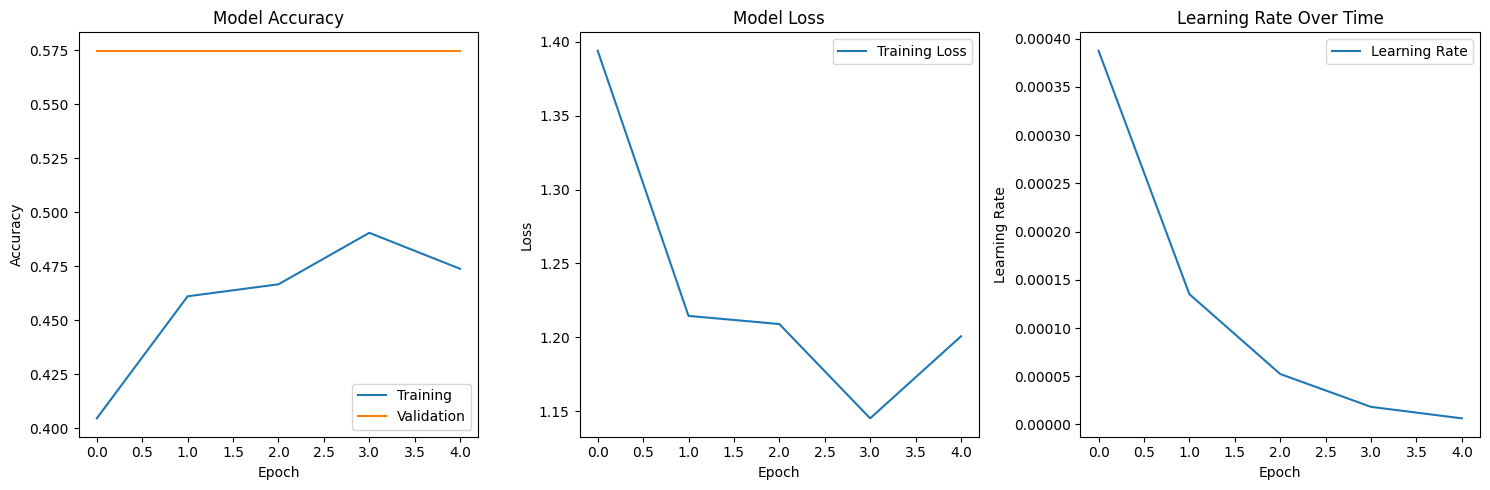

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameters
IMG_SIZE = 224  
BATCH_SIZE = 32
NUM_CLASSES = 3
CLASSES = ['early', 'middle', 'late']
EPOCHS = 20

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.4),
    layers.RandomContrast(0.4),
    layers.RandomTranslation(0.2, 0.2),
])

def encode_label(label):
    label_str = label.numpy().decode('utf-8')
    return CLASSES.index(label_str)

def preprocess(image, label):
    image = tf.ensure_shape(image, [None, None, None])
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = tf.image.resize_with_pad(image, IMG_SIZE, IMG_SIZE)
    label_idx = tf.py_function(func=encode_label, inp=[label], Tout=tf.int32)
    label_idx = tf.reshape(label_idx, ())
    image.set_shape([IMG_SIZE, IMG_SIZE, 3])
    label_idx.set_shape(())
    return image, label_idx

def create_dataset(data, is_training=False):
    try:
        ds = (data
              .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
              .cache()
              .shuffle(1000 if is_training else 100)
              .batch(BATCH_SIZE)
              .prefetch(tf.data.AUTOTUNE))
        for images, labels in ds.take(1):
            print(f"Dataset verification - Images shape: {images.shape}, Labels shape: {labels.shape}")
        return ds
    except Exception as e:
        print(f"Error creating dataset: {str(e)}")
        raise

def create_transfer_model():
    """Create model with transfer learning using ResNet101"""
    base_model = tf.keras.applications.ResNet101(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    base_model.trainable = False
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = data_augmentation(inputs)
    x = tf.keras.applications.resnet.preprocess_input(x)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(NUM_CLASSES)(x)
    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Load data
print("Loading data...")
try:
    category = 'time'
    train_data = tf.data.Dataset.load(f'data/train_{category}')
    val_data = tf.data.Dataset.load(f'data/valid_{category}')
    train_ds = create_dataset(train_data, is_training=True)
    val_ds = create_dataset(val_data)
except Exception as e:
    print(f"Error loading data: {str(e)}")
    raise


print("Creating model with transfer learning...")
model = create_transfer_model()

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10,
    decay_rate=0.9,
    staircase=True
)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    train_acc_metric.update_state(labels, predictions)
    return loss

@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    val_acc_metric.update_state(labels, predictions)

def unfreeze_model():
    """Unfreeze layers for fine-tuning"""
    print("Fine-tuning model...")
    base_model = model.layers[3]
    base_model.trainable = True
    for layer in base_model.layers[:-30]:
        layer.trainable = False
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-5),
        loss=loss_fn,
        metrics=['accuracy']
    )

# Training loop
print("\nStarting training...")
history = {'loss': [], 'accuracy': [], 'val_accuracy': [], 'learning_rates': []}
try:
    best_val_acc = 0
    patience = 5
    patience_counter = 0
    step_counter = 0
    
    for epoch in range(EPOCHS):
        print(f"\nEpoch {epoch+1}/{EPOCHS}")
        epoch_loss = []
        for step, (images, labels) in enumerate(train_ds):
            loss = train_step(images, labels)
            epoch_loss.append(float(loss))
            if step % 5 == 0:
                print(f"Step {step}: Loss = {float(loss):.4f}")
            step_counter += 1
        
        train_acc = train_acc_metric.result()
        print(f"Training accuracy: {float(train_acc):.4f}")
        for images, labels in val_ds:
            val_step(images, labels)
        val_acc = val_acc_metric.result()
        print(f"Validation accuracy: {float(val_acc):.4f}")
        current_lr = lr_schedule(step_counter)
        if float(val_acc) > best_val_acc:
            best_val_acc = float(val_acc)
            patience_counter = 0
        else:
            patience_counter += 1
        if patience_counter >= patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs")
            break
        history['loss'].append(np.mean(epoch_loss))
        history['accuracy'].append(float(train_acc))
        history['val_accuracy'].append(float(val_acc))
        history['learning_rates'].append(float(current_lr))
        train_acc_metric.reset_state()
        val_acc_metric.reset_state()
        if epoch == 10 and best_val_acc > 0.7:
            unfreeze_model()
    
    # Plotting
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(history['accuracy'], label='Training')
    plt.plot(history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 3, 3)
    plt.plot(history['learning_rates'], label='Learning Rate')
    plt.title('Learning Rate Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("\nError during training:", str(e))


### MobileNetV2

Loading data...
Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)
Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)
Creating transfer learning model with MobileNetV2...


2024-11-21 10:14:43.736678: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-21 10:14:43.924365: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.



Starting training...
Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.4117 - loss: 1.4592 - val_accuracy: 0.5660 - val_loss: 1.1791
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4831 - loss: 1.1874 - val_accuracy: 0.5455 - val_loss: 1.0683
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4829 - loss: 1.2021 - val_accuracy: 0.5601 - val_loss: 1.1426
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4970 - loss: 1.1576 - val_accuracy: 0.5425 - val_loss: 1.3701
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4997 - loss: 1.1171 - val_accuracy: 0.5484 - val_loss: 1.5556
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4874 - loss: 1.1537 - val_accuracy: 0.5367 - val_loss: 1.7442
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4896 - loss: 1.1744 - val_accuracy: 0.5367 - val_loss: 1.9129
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4859 - loss: 1.1360 - va

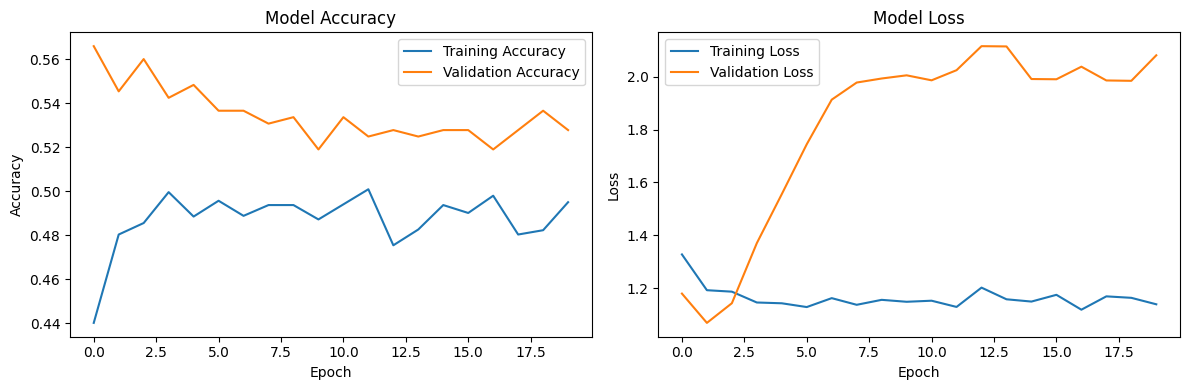


Fine-tuning the base model...
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.4573 - loss: 1.3990 - val_accuracy: 0.4985 - val_loss: 1.4475
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4748 - loss: 1.3062 - val_accuracy: 0.4839 - val_loss: 1.5110
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4850 - loss: 1.2769 - val_accuracy: 0.4809 - val_loss: 1.5501
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5041 - loss: 1.1805 - val_accuracy: 0.4985 - val_loss: 1.5543
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4942 - loss: 1.1897 - val_accuracy: 0.4839 - val_loss: 1.5276
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4939 - loss: 1.2285 - val_accuracy: 0.4809 - val_loss: 1.5757
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4977 - loss: 1.1998 - val_accuracy: 0.4545 - val_loss: 1.6736
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4764 - loss: 1

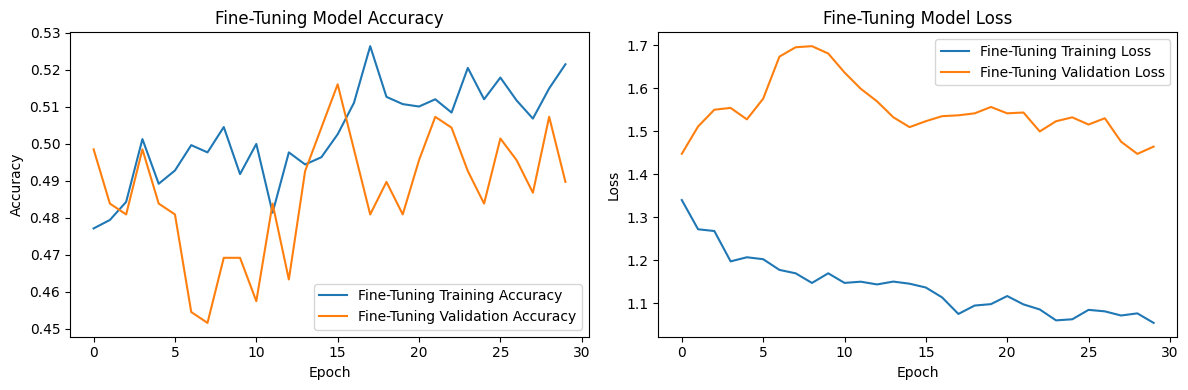

In [5]:
# Hyperparameters
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 3
CLASSES = ['early', 'middle', 'late']
EPOCHS = 20

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.4),
    layers.RandomContrast(0.4),
    layers.RandomTranslation(0.2, 0.2),
])

def encode_label(label):
    label_str = label.numpy().decode('utf-8')
    return CLASSES.index(label_str)

def preprocess(image, label):
    image = tf.ensure_shape(image, [None, None, None])
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = tf.image.resize_with_pad(image, IMG_SIZE, IMG_SIZE)
    label_idx = tf.py_function(func=encode_label, inp=[label], Tout=tf.int32)
    label_idx = tf.reshape(label_idx, ())
    image.set_shape([IMG_SIZE, IMG_SIZE, 3])
    label_idx.set_shape(())
    return image, label_idx

def create_dataset(data, is_training=False):
    try:
        ds = (data
              .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
              .cache()
              .shuffle(1000 if is_training else 100)
              .batch(BATCH_SIZE)
              .prefetch(tf.data.AUTOTUNE))
        for images, labels in ds.take(1):
            print(f"Dataset verification - Images shape: {images.shape}, Labels shape: {labels.shape}")
        return ds
    except Exception as e:
        print(f"Error creating dataset: {str(e)}")
        raise

def create_transfer_learning_model(input_shape=(224, 224, 3), num_classes=3):
    """Use a pretrained MobileNetV2 as a substitute for AlexNet."""
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,  
        weights='imagenet'  
    )
    base_model.trainable = False  

    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs) 
    x = base_model(x, training=False)  
    x = layers.GlobalAveragePooling2D()(x)  
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes)(x) 

    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Load data
print("Loading data...")
try:
    category = 'time'
    train_data = tf.data.Dataset.load(f'data/train_{category}')
    val_data = tf.data.Dataset.load(f'data/valid_{category}')
    train_ds = create_dataset(train_data, is_training=True)
    val_ds = create_dataset(val_data)
except Exception as e:
    print(f"Error loading data: {str(e)}")
    raise


print("Creating transfer learning model with MobileNetV2...")
model = create_transfer_learning_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=NUM_CLASSES)


initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10,
    decay_rate=0.9,
    staircase=True
)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

# Training Loop
print("\nStarting training...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Fine-Tuning
print("\nFine-tuning the base model...")

base_model = model.layers[2]  
base_model.trainable = True  


for layer in base_model.layers[:100]: 
    layer.trainable = False


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=loss_fn,
    metrics=["accuracy"]
)

# Training Loop 2
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,  # Additional fine-tuning epochs
    verbose=1
)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fine_tune_history.history["accuracy"], label="Fine-Tuning Training Accuracy")
plt.plot(fine_tune_history.history["val_accuracy"], label="Fine-Tuning Validation Accuracy")
plt.title("Fine-Tuning Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fine_tune_history.history["loss"], label="Fine-Tuning Training Loss")
plt.plot(fine_tune_history.history["val_loss"], label="Fine-Tuning Validation Loss")
plt.title("Fine-Tuning Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

With the implementation of mobilenetv2 it appears that that the accuracies are improving, but the loss remains pretty poor. After some fine-tuning the loss seems to trend down -- perhaps we should run this for more fine-tuning epochs (currently 30).

### ResNet 101

Loading data...
Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)
Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)


2024-11-21 10:29:19.495517: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-21 10:29:19.696290: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Creating model with transfer learning...

Starting training...

Epoch 1/20
Step 0: Loss = 1.6529
Step 5: Loss = 1.7657
Step 10: Loss = 1.4404
Step 15: Loss = 1.0141
Step 20: Loss = 1.3469
Step 25: Loss = 1.4987
Step 30: Loss = 1.2047
Step 35: Loss = 1.5764
Step 40: Loss = 1.5011
Step 45: Loss = 1.5208
Step 50: Loss = 0.9667
Step 55: Loss = 1.1946
Step 60: Loss = 1.5809
Step 65: Loss = 1.0417
Step 70: Loss = 1.1282
Step 75: Loss = 1.1940
Step 80: Loss = 1.1915
Step 85: Loss = 1.4597
Step 90: Loss = 1.0694
Step 95: Loss = 1.0073
Training accuracy: 0.4076
Validation accuracy: 0.5748

Epoch 2/20
Step 0: Loss = 1.1705
Step 5: Loss = 1.4829
Step 10: Loss = 1.2491
Step 15: Loss = 1.1380
Step 20: Loss = 1.0639
Step 25: Loss = 1.0542
Step 30: Loss = 1.2370
Step 35: Loss = 1.0547
Step 40: Loss = 1.0730
Step 45: Loss = 1.3073
Step 50: Loss = 1.5039
Step 55: Loss = 1.4571
Step 60: Loss = 1.0139
Step 65: Loss = 1.2308
Step 70: Loss = 1.2377
Step 75: Loss = 1.1253
Step 80: Loss = 0.8654
Step 85: Los

2024-11-21 10:30:05.087045: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation accuracy: 0.5718

Epoch 6/20
Step 0: Loss = 1.3756
Step 5: Loss = 0.9741
Step 10: Loss = 1.1580
Step 15: Loss = 1.0208
Step 20: Loss = 1.0451
Step 25: Loss = 1.0451
Step 30: Loss = 1.4935
Step 35: Loss = 1.2233
Step 40: Loss = 1.3081
Step 45: Loss = 1.0080
Step 50: Loss = 0.8296
Step 55: Loss = 1.1053
Step 60: Loss = 0.9233
Step 65: Loss = 1.0964
Step 70: Loss = 1.1239
Step 75: Loss = 0.8765
Step 80: Loss = 1.3838
Step 85: Loss = 1.3882
Step 90: Loss = 1.4486
Step 95: Loss = 1.0982
Training accuracy: 0.4651
Validation accuracy: 0.5748

Early stopping triggered after 6 epochs


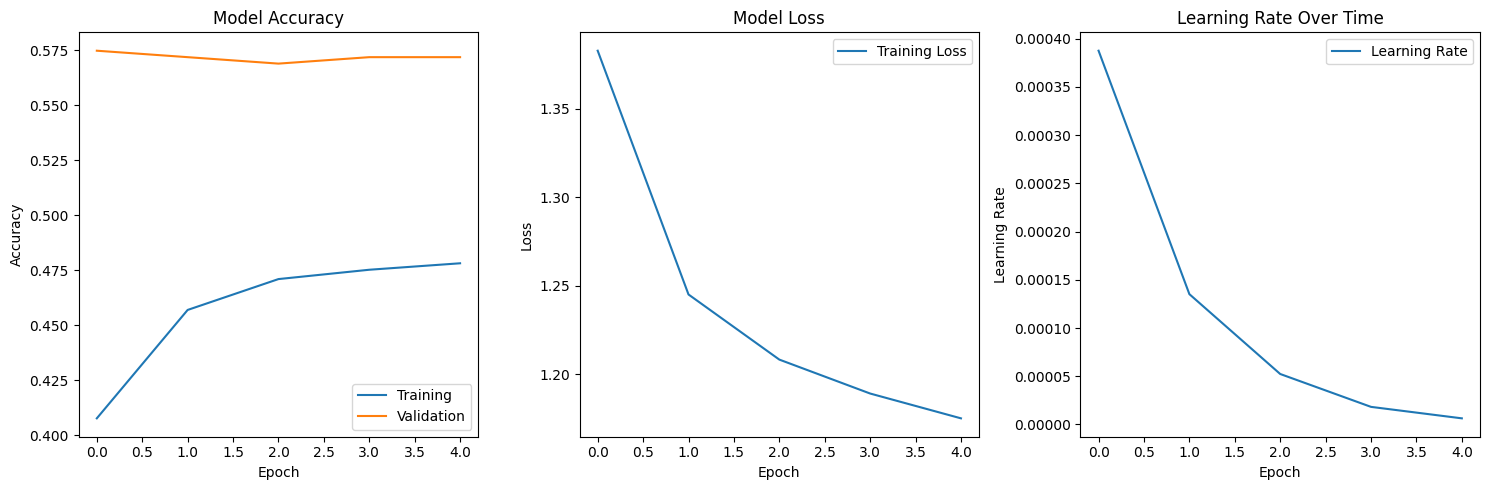

In [10]:
def create_transfer_model():
    """Create model with transfer learning using ResNet101"""
    base_model = tf.keras.applications.ResNet101(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    base_model.trainable = False
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = data_augmentation(inputs)
    x = tf.keras.applications.resnet.preprocess_input(x)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(NUM_CLASSES)(x)
    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Load data
print("Loading data...")
try:
    category = 'time'
    train_data = tf.data.Dataset.load(f'data/train_{category}')
    val_data = tf.data.Dataset.load(f'data/valid_{category}')
    train_ds = create_dataset(train_data, is_training=True)
    val_ds = create_dataset(val_data)
except Exception as e:
    print(f"Error loading data: {str(e)}")
    raise


print("Creating model with transfer learning...")
model = create_transfer_model()


initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10,
    decay_rate=0.9,
    staircase=True
)


loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    train_acc_metric.update_state(labels, predictions)
    return loss

@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    val_acc_metric.update_state(labels, predictions)

def unfreeze_model():
    """Unfreeze layers for fine-tuning"""
    print("Fine-tuning model...")
    base_model = model.layers[3]
    base_model.trainable = True
    for layer in base_model.layers[:-30]:
        layer.trainable = False
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-5),
        loss=loss_fn,
        metrics=['accuracy']
    )

# Training loop
print("\nStarting training...")
history = {'loss': [], 'accuracy': [], 'val_accuracy': [], 'learning_rates': []}
try:
    best_val_acc = 0
    patience = 5
    patience_counter = 0
    step_counter = 0
    
    for epoch in range(EPOCHS):
        print(f"\nEpoch {epoch+1}/{EPOCHS}")
        epoch_loss = []
        for step, (images, labels) in enumerate(train_ds):
            loss = train_step(images, labels)
            epoch_loss.append(float(loss))
            if step % 5 == 0:
                print(f"Step {step}: Loss = {float(loss):.4f}")
            step_counter += 1
        
        train_acc = train_acc_metric.result()
        print(f"Training accuracy: {float(train_acc):.4f}")
        for images, labels in val_ds:
            val_step(images, labels)
        val_acc = val_acc_metric.result()
        print(f"Validation accuracy: {float(val_acc):.4f}")
        current_lr = lr_schedule(step_counter)
        if float(val_acc) > best_val_acc:
            best_val_acc = float(val_acc)
            patience_counter = 0
        else:
            patience_counter += 1
        if patience_counter >= patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs")
            break
        history['loss'].append(np.mean(epoch_loss))
        history['accuracy'].append(float(train_acc))
        history['val_accuracy'].append(float(val_acc))
        history['learning_rates'].append(float(current_lr))
        train_acc_metric.reset_state()
        val_acc_metric.reset_state()
        if epoch == 10 and best_val_acc > 0.7:
            unfreeze_model()
    
    # Plotting
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(history['accuracy'], label='Training')
    plt.plot(history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 3, 3)
    plt.plot(history['learning_rates'], label='Learning Rate')
    plt.title('Learning Rate Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("\nError during training:", str(e))


There is a clear decline in model loss over time, but marginal changes in the overall validation accuracy

### ResNet 152

Loading data...
Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)
Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)


2024-11-21 10:33:36.825498: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-21 10:33:37.017375: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Creating model with transfer learning...
234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Starting training...

Epoch 1/20
Step 0: Loss = 2.1215
Step 5: Loss = 1.5363
Step 10: Loss = 1.4866
Step 15: Loss = 1.6085
Step 20: Loss = 1.5154
Step 25: Loss = 1.9123
Step 30: Loss = 1.6618
Step 35: Loss = 1.6577
Step 40: Loss = 1.1762
Step 45: Loss = 1.3276
Step 50: Loss = 1.1043
Step 55: Loss = 1.1983
Step 60: Loss = 1.5896
Step 65: Loss = 1.3208
Step 70: Loss = 1.1420
Step 75: Loss = 1.6345
Step 80: Loss = 1.4808
Step 85: Loss = 1.1906
Step 90: Loss = 1.3036
Step 95: Loss = 1.5138
Training accuracy: 0.4109
Validation accuracy: 0.5748

Epoch 2/20
Step 0: Loss = 1.0687
Step 5: Loss = 1.4339
Step 10: Loss = 1.3445
Step 15: Loss = 1.2716
Step 20: Loss = 1.3668
Step 25: Loss = 1.2992
Step 30: Loss = 1.3075
Step 35: Loss = 1.3353
Step 40: Loss = 1.1371
Step 45: Loss = 1.4559
Step 50: Loss = 1.2108
Step 55: Loss = 1.4842
Step 60: Loss = 1.2332
Step 65: Loss = 1.3886
Step 70: Loss = 1.2817
Step 

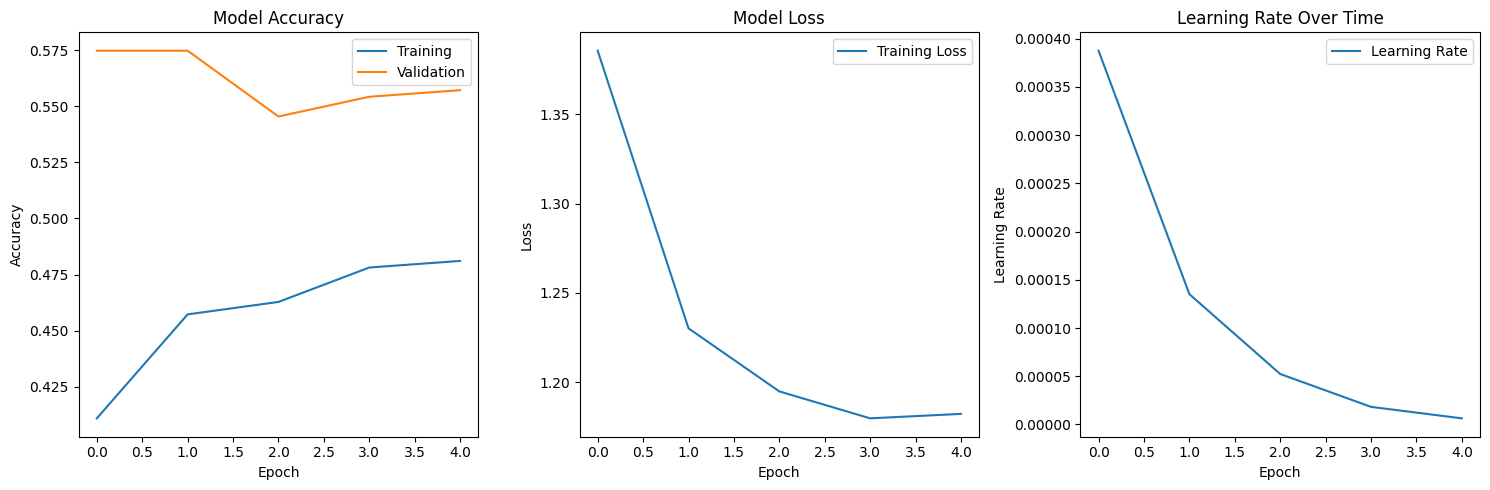

In [11]:
def create_transfer_model():
    """Create model with transfer learning using ResNet152"""
    base_model = tf.keras.applications.ResNet152(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    base_model.trainable = False
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = data_augmentation(inputs)
    x = tf.keras.applications.resnet.preprocess_input(x)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(NUM_CLASSES)(x)
    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Load data
print("Loading data...")
try:
    category = 'time'
    train_data = tf.data.Dataset.load(f'data/train_{category}')
    val_data = tf.data.Dataset.load(f'data/valid_{category}')
    train_ds = create_dataset(train_data, is_training=True)
    val_ds = create_dataset(val_data)
except Exception as e:
    print(f"Error loading data: {str(e)}")
    raise


print("Creating model with transfer learning...")
model = create_transfer_model()


initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10,
    decay_rate=0.9,
    staircase=True
)


loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    train_acc_metric.update_state(labels, predictions)
    return loss

@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    val_acc_metric.update_state(labels, predictions)

def unfreeze_model():
    """Unfreeze layers for fine-tuning"""
    print("Fine-tuning model...")
    base_model = model.layers[3]
    base_model.trainable = True
    for layer in base_model.layers[:-30]:
        layer.trainable = False
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-5),
        loss=loss_fn,
        metrics=['accuracy']
    )

# Training loop
print("\nStarting training...")
history = {'loss': [], 'accuracy': [], 'val_accuracy': [], 'learning_rates': []}
try:
    best_val_acc = 0
    patience = 5
    patience_counter = 0
    step_counter = 0
    
    for epoch in range(EPOCHS):
        print(f"\nEpoch {epoch+1}/{EPOCHS}")
        epoch_loss = []
        for step, (images, labels) in enumerate(train_ds):
            loss = train_step(images, labels)
            epoch_loss.append(float(loss))
            if step % 5 == 0:
                print(f"Step {step}: Loss = {float(loss):.4f}")
            step_counter += 1
        
        train_acc = train_acc_metric.result()
        print(f"Training accuracy: {float(train_acc):.4f}")
        for images, labels in val_ds:
            val_step(images, labels)
        val_acc = val_acc_metric.result()
        print(f"Validation accuracy: {float(val_acc):.4f}")
        current_lr = lr_schedule(step_counter)
        if float(val_acc) > best_val_acc:
            best_val_acc = float(val_acc)
            patience_counter = 0
        else:
            patience_counter += 1
        if patience_counter >= patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs")
            break
        history['loss'].append(np.mean(epoch_loss))
        history['accuracy'].append(float(train_acc))
        history['val_accuracy'].append(float(val_acc))
        history['learning_rates'].append(float(current_lr))
        train_acc_metric.reset_state()
        val_acc_metric.reset_state()
        if epoch == 10 and best_val_acc > 0.7:
            unfreeze_model()
    
    # Plotting
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(history['accuracy'], label='Training')
    plt.plot(history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 3, 3)
    plt.plot(history['learning_rates'], label='Learning Rate')
    plt.title('Learning Rate Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("\nError during training:", str(e))


Again, we see a rather steep decline in model loss, but marginal changes in the accuracies before early-stopping. There might be value in disabling early-stopping and seeing how it does after many training cycles.

Overall, transfer learning has provided solid gains in validation accuracy >10%, but the overall loss seems to be higher as well. This may change as we allow the models to run for longer periods of time.

### Advanced Model Architecture

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# Hyperparameters
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 3
CLASSES = ['early', 'middle', 'late']
EPOCHS = 20

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.4),
    layers.RandomContrast(0.4),
    layers.RandomTranslation(0.2, 0.2),
])

def encode_label(label):
    label_str = label.numpy().decode('utf-8')
    return CLASSES.index(label_str)

def preprocess(image, label):
    image = tf.ensure_shape(image, [None, None, None])
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = tf.image.resize_with_pad(image, IMG_SIZE, IMG_SIZE)
    label_idx = tf.py_function(func=encode_label, inp=[label], Tout=tf.int32)
    label_idx = tf.reshape(label_idx, ())
    image.set_shape([IMG_SIZE, IMG_SIZE, 3])
    label_idx.set_shape(())
    return image, label_idx

def create_dataset(data, is_training=False):
    try:
        ds = (data
              .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
              .cache()
              .shuffle(1000 if is_training else 100)
              .batch(BATCH_SIZE)
              .prefetch(tf.data.AUTOTUNE))
        for images, labels in ds.take(1):
            print(f"Dataset verification - Images shape: {images.shape}, Labels shape: {labels.shape}")
        return ds
    except Exception as e:
        print(f"Error creating dataset: {str(e)}")
        raise

# SE Block
def squeeze_excitation_block(input_tensor, ratio=16):
    """Squeeze-and-Excitation Block."""
    filters = input_tensor.shape[-1]
    se_shape = (1, 1, filters)
    
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Reshape(se_shape)(se)
    se = layers.Dense(filters // ratio, activation='relu', kernel_initializer='he_normal')(se)
    se = layers.Dense(filters, activation='sigmoid', kernel_initializer='he_normal')(se)
    return layers.multiply([input_tensor, se])

# SENet Model with ResNet50 Backbone
def create_senet_model(input_shape=(224, 224, 3), num_classes=3):
    """Custom SENet model using a ResNet50 backbone."""
    base_model = tf.keras.applications.ResNet50(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet' 
    )
    base_model.trainable = False  

    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)  
    x = base_model(x, training=False) 

   
    x = squeeze_excitation_block(x)

   
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes)(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Load data
print("Loading data...")
try:
    category = 'time'
    train_data = tf.data.Dataset.load(f'data/train_{category}')
    val_data = tf.data.Dataset.load(f'data/valid_{category}')
    train_ds = create_dataset(train_data, is_training=True)
    val_ds = create_dataset(val_data)
except Exception as e:
    print(f"Error loading data: {str(e)}")
    raise


print("Creating SENet model...")
model = create_senet_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=NUM_CLASSES)


initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10,
    decay_rate=0.9,
    staircase=True
)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

# Training Loop
print("\nStarting training...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)



# # Fine-Tuning
# print("\nFine-tuning the base model...")
# base_model = model.layers[2]  
# base_model.trainable = True  


# for layer in base_model.layers[:100]:  
#     layer.trainable = False

# # recompile w/ a lower learning rate
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#     loss=loss_fn,
#     metrics=["accuracy"]
# )

# # Training loop 2
# fine_tune_history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=10,
#     verbose=1
# )





2024-12-09 14:03:13.007188: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-09 14:03:13.481531: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-09 14:03:17.330053: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1282 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:63:00.0, compute capability: 8.6
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.e

Loading data...


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 14523421295911776837


Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)


2024-12-09 14:03:18.265532: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 4280183468569771705


Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)
Creating SENet model...


2024-12-09 14:03:18.598166: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.



Starting training...
Epoch 1/20


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 14523421295911776837
2024-12-09 14:03:22.462091: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2024-12-09 14:03:23.002832: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:625] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-12-09 14:03:23.539465: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f203626fde0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-09 14:03:23.539506: I tensorflow/compiler/xla/ser

96/96 [==============================] - ETA: 0s - loss: 1.2878 - accuracy: 0.4305

[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 4280183468569771705


96/96 [==============================] - 10s 54ms/step - loss: 1.2878 - accuracy: 0.4305 - val_loss: 0.9840 - val_accuracy: 0.5748
Epoch 2/20
96/96 [==============================] - 4s 39ms/step - loss: 1.1711 - accuracy: 0.4830 - val_loss: 0.9503 - val_accuracy: 0.5748
Epoch 3/20
96/96 [==============================] - 4s 38ms/step - loss: 1.1659 - accuracy: 0.4902 - val_loss: 0.9498 - val_accuracy: 0.5806
Epoch 4/20
96/96 [==============================] - 4s 38ms/step - loss: 1.1659 - accuracy: 0.4856 - val_loss: 0.9415 - val_accuracy: 0.5718
Epoch 5/20
96/96 [==============================] - 4s 38ms/step - loss: 1.1584 - accuracy: 0.4847 - val_loss: 0.9429 - val_accuracy: 0.5777
Epoch 6/20
96/96 [==============================] - 4s 38ms/step - loss: 1.1307 - accuracy: 0.4984 - val_loss: 0.9474 - val_accuracy: 0.5777
Epoch 7/20
96/96 [==============================] - 4s 38ms/step - loss: 1.1669 - accuracy: 0.4889 - val_loss: 0.9513 - val_accuracy: 0.5660
Epoch 8/20
96/96 [=====

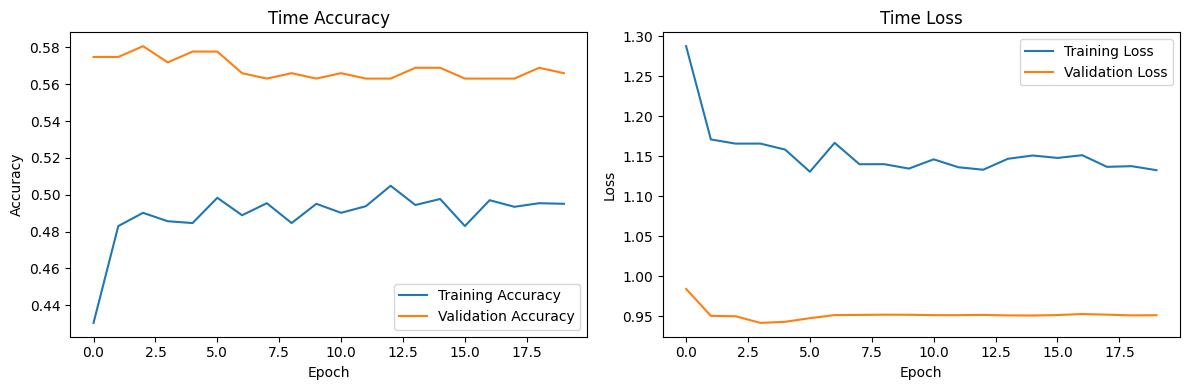

In [2]:
# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Time Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Time Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# # Plotting
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(fine_tune_history.history["accuracy"], label="Fine-Tuning Training Accuracy")
# plt.plot(fine_tune_history.history["val_accuracy"], label="Fine-Tuning Validation Accuracy")
# plt.title("Fine-Tuning Time Accuracy")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(fine_tune_history.history["loss"], label="Fine-Tuning Training Loss")
# plt.plot(fine_tune_history.history["val_loss"], label="Fine-Tuning Validation Loss")
# plt.title("Fine-Tuning Time Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()

# plt.tight_layout()
# plt.show()

In [3]:
#savesave
model_directory = "/sfs/gpfs/tardis/project/SDS/instructional/DS-6050-DL/24F/ClassicalArt_Project/submodels_final"
os.makedirs(model_directory, exist_ok=True)
model_path = os.path.join(model_directory, 'time_model.keras')
model.save(model_path, save_format = 'keras')

#verification
print(f"Full path to model: {os.path.abspath(model_path)}")

Full path to model: /sfs/gpfs/tardis/project/SDS/instructional/DS-6050-DL/24F/ClassicalArt_Project/submodels_final/time_model.keras


Using a SE block with a ResNet background, we can see an immediate increase in validation accuracy on average of about 2%. Between fine-tuning and the frozen model, we can see a clear downward trend in model loss as well as an upward trend in model accuracy. This warrants investigation across more training epochs.